Pretraining Autoencoder for Downstream Tasks
===

## Overview

In this notebook, we train a mini VGG-based autoencoder on the MNIST dataset.

## Setup

We setup our libraries.

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

__author__ = 'Abien Fred Agarap'
__version__ = '1.0.0'

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tf.vgg_ae import CAE

Set the memory growth of GPU.

In [2]:
tf.config.experimental.set_memory_growth(
    tf.config.experimental.list_physical_devices('GPU')[0], True
)

Set the random number generator seed value.

In [3]:
SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

We set the batch size and epochs.

In [4]:
batch_size = 512
epochs = 100

## Dataset

We load our dataset.

In [5]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

We preprocess our dataset.

In [6]:
train_features = train_features.reshape(-1, 28, 28, 1)

train_features = train_features.astype('float32')
train_features = train_features / 255.

test_features = test_features.reshape(-1, 28, 28, 1)

test_features = test_features.astype('float32')
test_features = test_features / 255.

train_labels = tf.one_hot(train_labels, len(np.unique(train_labels)))
test_labels = tf.one_hot(test_labels, len(np.unique(test_labels)))

We create a dataset object.

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_features))
train_dataset = train_dataset.batch(batch_size)
train_dataset = train_dataset.prefetch(batch_size * 4)
train_dataset = train_dataset.shuffle(train_features.shape[0])

test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_features))
test_dataset = train_dataset.batch(batch_size)
test_dataset = train_dataset.prefetch(batch_size * 4)
test_dataset = train_dataset.shuffle(test_features.shape[0])

In [8]:
model = CAE(input_shape=(28, 28, 1))

In [9]:
for train_features, _ in train_dataset:
    model(train_features)
    break

In [10]:
model.summary()

Model: "cae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder (Encoder)            multiple                  64992     
_________________________________________________________________
decoder (Decoder)            multiple                  92609     
Total params: 157,601
Trainable params: 157,601
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(
    loss=tf.losses.mean_squared_error, optimizer=tf.optimizers.Adam(learning_rate=1e-3)
)

In [12]:
model(train_features).shape

TensorShape([512, 28, 28, 1])

In [13]:
model.fit(train_dataset, epochs=epochs, verbose=2)

Epoch 1/100
118/118 - 35s - loss: 0.0299
Epoch 2/100
118/118 - 33s - loss: 0.0028
Epoch 3/100
118/118 - 33s - loss: 0.0015
Epoch 4/100
118/118 - 33s - loss: 0.0011
Epoch 5/100
118/118 - 34s - loss: 9.3605e-04
Epoch 6/100
118/118 - 33s - loss: 8.4620e-04
Epoch 7/100
118/118 - 34s - loss: 6.5575e-04
Epoch 8/100
118/118 - 34s - loss: 5.8227e-04
Epoch 9/100
118/118 - 33s - loss: 5.1975e-04
Epoch 10/100
118/118 - 33s - loss: 4.6579e-04
Epoch 11/100
118/118 - 33s - loss: 4.7819e-04
Epoch 12/100
118/118 - 33s - loss: 4.0206e-04
Epoch 13/100
118/118 - 33s - loss: 3.9162e-04
Epoch 14/100
118/118 - 33s - loss: 3.7155e-04
Epoch 15/100
118/118 - 33s - loss: 4.2576e-04
Epoch 16/100
118/118 - 33s - loss: 3.4104e-04
Epoch 17/100
118/118 - 33s - loss: 3.3538e-04
Epoch 18/100
118/118 - 33s - loss: 3.5801e-04
Epoch 19/100
118/118 - 33s - loss: 3.3598e-04
Epoch 20/100
118/118 - 33s - loss: 3.1422e-04
Epoch 21/100
118/118 - 33s - loss: 3.1869e-04
Epoch 22/100
118/118 - 33s - loss: 3.0840e-04
Epoch 23/100


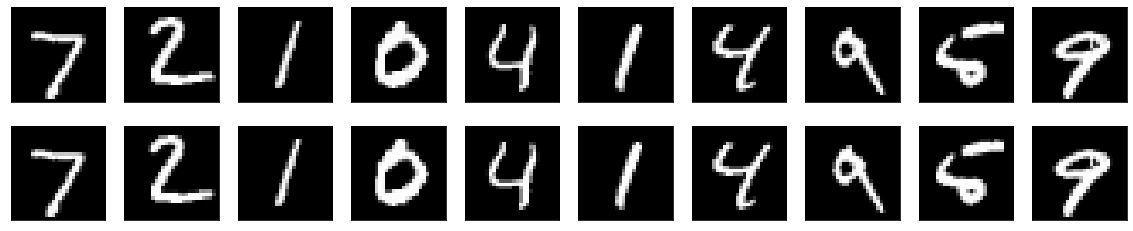

In [14]:
number = 10
plt.figure(figsize=(20, 4))
for index in range(number):
    # display original
    ax = plt.subplot(2, number, index + 1)
    plt.imshow(test_features[index].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, number, index + 1 + number)
    plt.imshow(model(test_features[index].reshape(-1, 28, 28, 1)).numpy().reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [15]:
model.save_weights('../assets/export/mnist/mini_vgg_ae_mnist', save_format='tf')